# 1- Selecionar base de dados

In [4]:
import pandas as pd
import plotly.graph_objects as go
df = pd.read_csv('Dados-Abertos.csv', encoding='ISO-8859-1', sep=';')

df.head()

,Nome Ente,UF,Código Siafi,Código IBGE,Data,Ano,Mês,Tipo Ente,OB,CNPJ do Favorecido,Nome Favorecido,Nome Emenda,Transferência Especial,Categoria Econômica Despesa,Valor
0,Nova Santa Rosa,PR,7979,4117222,42005,2015,janeiro,Município,135098000012015OB800001,77116663000109,MUNICIPIO DE NOVA SANTA ROSA,Emenda Individual,Não,DESPESAS DE CAPITAL,243750
1,Humaitá,RS,8695,4309704,42005,2015,janeiro,Município,135098000012015OB800002,87613139000199,MUNICIPIO DE HUMAITA,Emenda Individual,Não,DESPESAS DE CAPITAL,144300
2,Nova Venécia,ES,5677,3203908,42005,2015,janeiro,Município,135098000012015OB800003,27167428000180,MUNICIPIO DE NOVA VENECIA,Emenda Individual,Não,DESPESAS DE CAPITAL,97500
3,Gravatal,SC,8121,4206207,42005,2015,janeiro,Município,135098000012015OB800004,82926569000147,MUNICIPIO DE GRAVATAL,Emenda Individual,Não,DESPESAS DE CAPITAL,195000
4,Passo de Torres,SC,5541,4212254,42005,2015,janeiro,Município,135098000012015OB800005,95782793000154,MUNICIPIO DE PASSO DE TORRES,Emenda Individual,Não,DESPESAS DE CAPITAL,97500


In [5]:
df['Valor'] = pd.to_numeric(df['Valor'], errors='coerce')
print(df['Valor'].dtypes)

float64


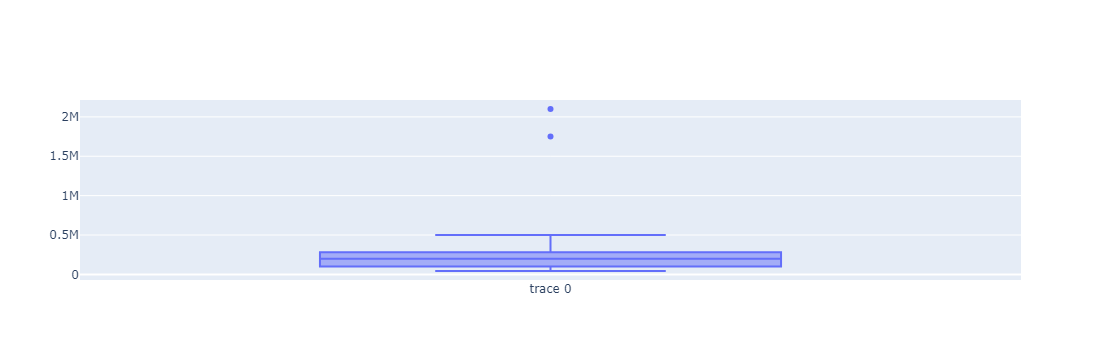

In [42]:
df_min_max = (df-df.min()) / (df.max()-df.min())

linhas_aleatorias = df_min_max.sample(n=30)

novo_df = df.loc[linhas_aleatorias.index]

fig = go.Figure()

fig.add_trace(go.Box(y=novo_df['Valor']))

fig.show()

# 2- Apresentar um relatório descritivo, quantidade de registros, valores faltando, linhas duplicadas e valores sujos

In [4]:
quantidade_registros = len(df)
print("Quantidade de registros:", quantidade_registros)

Quantidade de registros: 272076


In [5]:
valores_faltando_por_coluna = df.isna().sum()
print(valores_faltando_por_coluna)

Nome Ente                          0
UF                                 0
Código Siafi                       0
Código IBGE                        0
Data                               0
Ano                                0
Mês                                0
Tipo Ente                          0
OB                                 0
CNPJ do Favorecido                 0
Nome Favorecido                    0
Nome Emenda                        0
Transferência Especial             0
Categoria Econômica Despesa        0
Valor                          41083
dtype: int64


In [6]:
quantidade_duplicatas = df.duplicated().sum()

print("Quantidade de linhas duplicadas:", quantidade_duplicatas)

Quantidade de linhas duplicadas: 6201


In [7]:
quantidade_valores_sujos_por_coluna = df.isnull().sum()

print("Quantidade de valores sujos por coluna:")
print(quantidade_valores_sujos_por_coluna)

Quantidade de valores sujos por coluna:
Nome Ente                          0
UF                                 0
Código Siafi                       0
Código IBGE                        0
Data                               0
Ano                                0
Mês                                0
Tipo Ente                          0
OB                                 0
CNPJ do Favorecido                 0
Nome Favorecido                    0
Nome Emenda                        0
Transferência Especial             0
Categoria Econômica Despesa        0
Valor                          41083
dtype: int64


In [6]:
df = df.dropna(subset=['Valor'])

valores_faltando_por_coluna = df.isna().sum()
print(valores_faltando_por_coluna)

Nome Ente                      0
UF                             0
Código Siafi                   0
Código IBGE                    0
Data                           0
Ano                            0
Mês                            0
Tipo Ente                      0
OB                             0
CNPJ do Favorecido             0
Nome Favorecido                0
Nome Emenda                    0
Transferência Especial         0
Categoria Econômica Despesa    0
Valor                          0
dtype: int64


In [7]:
quantidade_registros = len(df)
print("Quantidade de registros:", quantidade_registros)

Quantidade de registros: 230993


# 2.1 Categorizando algumas colunas utilizando a norma Codificação Ordinal e retirando colunas que não serão necessárias no teste

In [8]:
print(df['Mês'].unique())

['janeiro' 'fevereiro' 'março' 'abril' 'maio' 'junho' 'julho' 'agosto'
 'setembro' 'outubro' 'novembro' 'dezembro']


In [9]:
print(df['Tipo Ente'].unique())

['Município' 'Estado']


In [10]:
print(df['Nome Emenda'].unique())

['Emenda Individual' 'Emenda de Bancada']


In [11]:
print(df['Transferência Especial'].unique())

['Não' 'Sim']


In [12]:
print(df['Categoria Econômica Despesa'].unique())

['DESPESAS DE CAPITAL' 'DESPESAS CORRENTES']


In [16]:
# Mapeamento de meses para valores ordinais
meses_para_ordinal = {
    'janeiro': 1, 'fevereiro': 2, 'março': 3, 'abril': 4,
    'maio': 5, 'junho': 6, 'julho': 7, 'agosto': 8,
    'setembro': 9, 'outubro': 10, 'novembro': 11, 'dezembro': 12
}

# Aplicando a codificação ordinal
df['Mês'] = df['Mês'].map(meses_para_ordinal)

print(df['Mês'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [17]:
tipo_ente_ordinal = {
    'Município': 0, 'Estado': 1
}

df['Tipo Ente'] = df['Tipo Ente'].map(tipo_ente_ordinal)

print(df['Tipo Ente'].unique())

[0 1]


In [18]:
nome_emenda_ordinal = {
    'Emenda Individual': 0, 'Emenda de Bancada': 1
}

df['Nome Emenda'] = df['Nome Emenda'].map(nome_emenda_ordinal)

print(df['Nome Emenda'].unique())

[0 1]


In [19]:
mapeamento = {'Não': 0, 'Sim': 1}

df['Transferência Especial'] = df['Transferência Especial'].map(mapeamento)

print(df['Transferência Especial'].unique())

[0 1]


In [20]:
mapeamento = {
    'DESPESAS DE CAPITAL': 0,
    'DESPESAS CORRENTES': 1
}

df['Categoria Econômica Despesa'] = df['Categoria Econômica Despesa'].map(mapeamento)

print(df['Categoria Econômica Despesa'].unique())

[0 1]


In [21]:
df = df.drop(['Nome Ente', 'UF', 'Código Siafi', 'Código IBGE', 'Data', 'OB', 'CNPJ do Favorecido', 'Nome Favorecido'], axis=1)

In [22]:
df.head()

,Ano,Mês,Tipo Ente,Nome Emenda,Transferência Especial,Categoria Econômica Despesa,Valor
0,2015,1,0,0,0,0,243750.0
1,2015,1,0,0,0,0,144300.0
2,2015,1,0,0,0,0,97500.0
3,2015,1,0,0,0,0,195000.0
4,2015,1,0,0,0,0,97500.0


# 3- Selecionar 10 algoritmos de classificação

In [43]:
# Importando o módulo de classificação
from pycaret.classification import *

# A função setup inicializa o ambiente no pycaret e prepara os dados para modelagem
setup_data = setup(data=df, target='Transferência Especial', session_id=1)

# Comparando os modelos
best_model = compare_models(sort='F1', n_select=1)  # 'sort' define o critério de comparação, 'F1' para F1-measure

print(best_model)

,Description,Value
0,Session id,1
1,Target,Transferência Especial
2,Target type,Binary
3,Original data shape,"(230993, 7)"
4,Transformed data shape,"(230993, 7)"
5,Transformed train set shape,"(161695, 7)"
6,Transformed test set shape,"(69298, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9794,0.9952,0.9051,0.9069,0.9059,0.8943,0.8944,0.5380
rf,Random Forest Classifier,0.9787,0.9881,0.9040,0.9019,0.9029,0.8909,0.8910,3.0010
et,Extra Trees Classifier,0.9784,0.9777,0.9027,0.9009,0.9017,0.8896,0.8896,2.2050
dt,Decision Tree Classifier,0.9783,0.9632,0.9029,0.9000,0.9014,0.8892,0.8892,0.1260
knn,K Neighbors Classifier,0.9650,0.9390,0.7843,0.8837,0.8310,0.8115,0.8134,0.6140
gbc,Gradient Boosting Classifier,0.9634,0.9867,0.8026,0.8547,0.8278,0.8073,0.8079,4.4060
ada,Ada Boost Classifier,0.9299,0.9609,0.5429,0.7487,0.6292,0.5916,0.6010,1.5370
lda,Linear Discriminant Analysis,0.8954,0.9185,0.3337,0.5377,0.4118,0.3578,0.3701,0.1150
qda,Quadratic Discriminant Analysis,0.7542,0.6343,0.3007,0.2641,0.1687,0.0815,0.1040,0.1080
lr,Logistic Regression,0.8901,0.7391,0.0013,0.2513,0.0026,0.0017,0.0118,1.1020


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


# 4- A melhor média F1, veio do algoritmo Light Gradient Boosting Machine

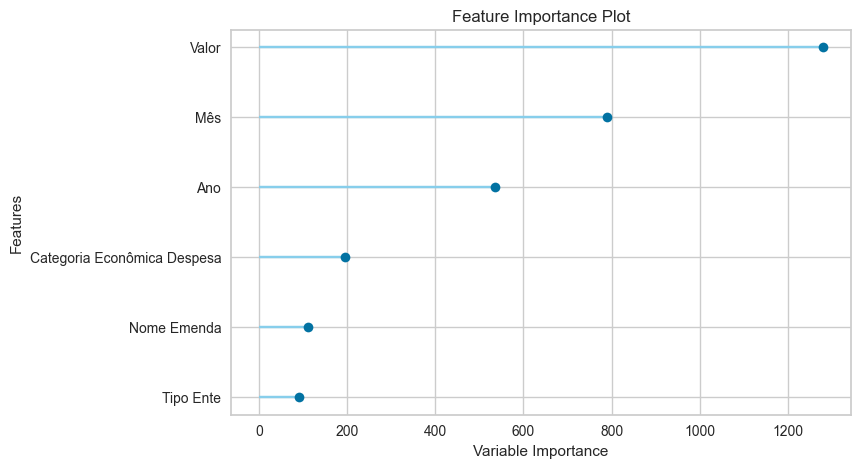

In [45]:
plot_model(best_model, plot = 'feature')

# 5- Treinando a base com algoritmo Light Gradient Boosting Machine e testando uma nova entrada para predição

In [17]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('Transferência Especial', axis=1) 
y = df['Transferência Especial']

# Dividir os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Configurar o modelo
model = lgb.LGBMClassifier(
    num_leaves=31,             # Número de folhas na árvore
    max_depth=-1,              # Profundidade máxima das árvores, -1 significa sem limite
    learning_rate=0.1,         # Taxa de aprendizado
    n_estimators=100           # Número de árvores a serem construídas
)

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 20284, number of negative: 164510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 285
[LightGBM] [Info] Number of data points in the train set: 184794, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.109765 -> initscore=-2.093139
[LightGBM] [Info] Start training from score -2.093139
Accuracy: 0.9801943765016559
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     41141
           1       0.91      0.91      0.91      5058

    accuracy                           0.98     46199
   macro avg       0.95      0.95      0.95     46199
weighted avg       0.98      0.98      0.98     46199



In [26]:
import numpy as np

novo_dado = [2021, 8, 1, 0, 0, 450000]
novo_dado_reshaped = np.array([novo_dado])  # Adiciona uma nova dimensão para formar um array 2D
new_predictions = model.predict(novo_dado_reshaped)

print("Predição:", new_predictions)

Predição: [1]
